# Introduction to Tensorflow

In this tutorial, we will learn about the basics of Tensorflow and how it helps to implement simple deep learning architectures. 


## What is Tensorflow?

Tensorflow is a library which was developed by the Google Brain team in November, 2015. It is gaining popularity as a library for numerical computation using data flow graphs. The graph structure has been designed such that the nodes represent mathematical operations and the edges represent tensors. Tensors are nothing but n-dimensional arrays. The main reason for tensorflow's popularity is:

1) Adaptability in a variety of programming languages e.g. Octave, C++, Python.

2) It is an open-source library.

3) It provides GPU support to allow for complex calculations on most kinds of computing devices.

4) Great network architecture visualization using Tensorboard

4) It has been made by Google and is becoming a standard across various organizations!

TensorFlow was originally developed by researchers and engineers working on the Google Brain Team within Google's Machine Intelligence research organization for the purposes of conducting machine learning and deep neural networks research.

## Installing Tensorflow

There are two ways to install Tensorflow. The first is through the native pip method. The other is through Anaconda. For obvious purposes, we will install it on Anaconda.

1) Create a conda environment named tensorflow by invoking the following command:

        C:> conda create -n tensorflow pip python=3.5
        
2) Activate the conda environment by issuing the following command:

        C:> activate tensorflow
        (tensorflow)C:>  # Your prompt should change
        
3) Issue the appropriate command to install TensorFlow inside your conda environment. To install the CPU-only version of TensorFlow, enter the following command:

        (tensorflow)C:> pip install --ignore-installed --upgrade tensorflow #CPU support only
        
4) Additional steps - You might need to install other libraries also in the Tensorflow environment. For this open the conda prompt and issue the following command:

        (tensorflow)C:> pip install --ignore-installed --upgrade tensorflow #CPU support only
        
## Validating Installation and First Program

We will run our first tensorflow program. This will also help us to validate whether the library has been downloaded properly or not.

In [1]:
import tensorflow as tf      # It is so popular that it has its own short-form
import pandas as pd          # May require to be installed in the Tensorflow environment separately
import numpy as np
import matplotlib.pyplot as plt     # May require to be installed in the Tensorflow environment separately
import csv
import sklearn # May require to be installed in the Tensorflow environment separately
# May need to install scipy also separately

In [2]:
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()                        #A session allocates resources for computations and holds the actual values of intermediate results and variables.
print(sess.run(hello))                     #You need to run the session

b'Hello, TensorFlow!'


You should be able to see the output: "b'Hello, TensorFlow!'"

## Learning the basics

Before attempting to code a complex neural network, it would be better if we could could learn the basic syntax and programming by attempting a simple linear regressional model. 

Before programming, we will discuss some basics. There are basically three types of data in Tensorflow:

1) Constants - These are constant values which cannot be changed after they are initialized. 

2) Variables - Variables are basically values which can be changed after initialization.

3) Placeholders - A placeholder is simply a variable that we will assign data to at a later date. It allows us to create our operations and build our computation graph, without needing the data.

There are in-built iterative functions which allow for regression and updating the weights in Tensorflow. We will use the GradientDescentOptimizer function to solve a simple linear regression to get started. Please read comments below to understand the code.

In [20]:
sess = tf.Session()

W = tf.Variable([0.76])                              # initialization of weights. Can be zero
b = tf.Variable([0.2156])                            # initialization of bias term. Can be zero
x = tf.placeholder(tf.float32)                       # initialization of the input vector
linear_model = W*x+b                                 # This is our predicted output for the input vector based on weights

init = tf.global_variables_initializer()             # Just declaring the variables does not allow allocation of resources.
sess.run(init)                                       # You need to create an initializer for the variables and then run the
                                                     # the initializer in the session
    
print(sess.run(linear_model, {x:[1,2,3,4]}))         # This will output the original prediction according to the weights

# This is where the distinction between placeholder and variable becomes clear. You do not want to initialize your actual 
# output with a value. The value will be received later.

y = tf.placeholder(tf.float32)                       

# Implementing the least squares error loss function. This calculates the squared loss vector
squared_deltas = tf.square(linear_model - y)

# This reduces all the vector values to a single sum
loss = tf.reduce_sum(squared_deltas)

# The actual output vector needs to be [-3,-1,1,3]. We calculate the loss function between the predicted value of y 
# and actual value of y using the initialized weights and bias term.

print(sess.run(loss, {x:[1,2,3,4], y:[-3,-1,1,3]}))

[0.9756 1.7356 2.4956 3.2556]
25.591053


We will get the  predicted y-values as [0.9756 1.7356 2.4956 3.2556]. This is much different than the required output [-3,-1,1,3]. Also, the loss function as 25.591053. This is a very large loss.

Now, we will use GradientDescentOptimizer function to train the weights.

In [21]:
train = tf.train.GradientDescentOptimizer(0.01).minimize(loss) 
# Now, the above function will do all the heavy weight lifting. In each iteration, it will train the weights at the learning rate
# of 0.01 and try to reach the optima at which the weights predict the values correctly. We will run this for 1000
# iterations below
for i in range(1000):
    sess.run(train, {x:[1,2,3,4], y:[-3,-1,1,3]})
print(sess.run([W,b]))
print(sess.run(loss, {x:[1,2,3,4], y:[-3,-1,1,3]}))

[array([1.9999893], dtype=float32), array([-4.9999685], dtype=float32)]
6.6239636e-10


The weights are almost 2 and -5. The method does not give a closed form solution. So, you do not get the exact value. However, it is close enough. Now, with this basic information, we might be ready to try implementing a neural network architecture to classify data.

## Dataset Selection and Cleaning

The dataset we will be working on is the primary results from the 2016 US elections. This is an interesting dataset because it involved very unpredictable results. What would be interesting to see is if we can predict the winners in each county voting for the election of the Democratic and Republican presumptive nominee. The Democrats had two candidates and the Republicans had 17.

We will be training a neural network such that if we know the outcome of the primary elections in 80% of the counties, will we be able to predict the winner for the other  states? A good way to frame the question will be to see if demographics has some underlying criteria which helps in determining the winner of the elections. For this, we first need to upload and perform data cleaning on the dataset.


In [22]:
mydatares = pd.read_csv("C:/Users/Yash Kumar/Desktop/Studies/Spring 2018/Practical Data Science/Tutorial/primary_results.csv")
mydatacty = pd.read_csv("C:/Users/Yash Kumar/Desktop/Studies/Spring 2018/Practical Data Science/Tutorial/county_facts.csv")
# print(mydatares.head())
# print(mydatacty.head())

     state state_abbreviation   county    fips     party        candidate  \
0  Alabama                 AL  Autauga  1001.0  Democrat   Bernie Sanders   
1  Alabama                 AL  Autauga  1001.0  Democrat  Hillary Clinton   
2  Alabama                 AL  Baldwin  1003.0  Democrat   Bernie Sanders   
3  Alabama                 AL  Baldwin  1003.0  Democrat  Hillary Clinton   
4  Alabama                 AL  Barbour  1005.0  Democrat   Bernie Sanders   

   votes  fraction_votes  
0    544           0.182  
1   2387           0.800  
2   2694           0.329  
3   5290           0.647  
4    222           0.078  
   fips       area_name state_abbreviation  PST045214  PST040210  PST120214  \
0     0   United States                NaN  318857056  308758105        3.3   
1  1000         Alabama                NaN    4849377    4780127        1.4   
2  1001  Autauga County                 AL      55395      54571        1.5   
3  1003  Baldwin County                 AL     200111     1

So, the first dataset contains the labels i.e. how many votes each candidate got in each sector, and the second set contains the demographics of each county.

First of all, we need to clean up the demographics dataset as it has state, national and NaN values as well apart from county values. As we only need the county values, we will need to discard the combined country/state values. Also, the demographics data has a lot of categories. The data dictionary csv file explains what these are. It will be easier to choose the features for the neural network, if we replace the data dictionary columns with their meanings.

Then, cleaning is also required in the label dataset. Firstly, we need to split the dataset for Democrats and Republicans, because each county had separate voting for the two parties. The labels are not explicitly given for the dataset. We only know how many votes each candidate got. We need to the most voted candidate for each county. In the end, we will inner join the two datasets based on the county name, so that we have each of the feature instances matched with their labels.

In [23]:
mydatacty = mydatacty.dropna()   # dropping all the NA values
mydatares = mydatares.dropna()   # dropping all the NA values
reader = csv.DictReader(open('county_facts_dictionary.csv')) # loading the data dictionary
result = {}
for row in reader:
    result[row['column_name']] = row['description']
(result)

{'AFN120207': 'Accommodation and food services sales, 2007 ($1,000)',
 'AGE135214': 'Persons under 5 years, percent, 2014',
 'AGE295214': 'Persons under 18 years, percent, 2014',
 'AGE775214': 'Persons 65 years and over, percent, 2014',
 'BPS030214': 'Building permits, 2014',
 'BZA010213': 'Private nonfarm establishments, 2013',
 'BZA110213': 'Private nonfarm employment,  2013',
 'BZA115213': 'Private nonfarm employment, percent change, 2012-2013',
 'EDU635213': 'High school graduate or higher, percent of persons age 25+, 2009-2013',
 'EDU685213': "Bachelor's degree or higher, percent of persons age 25+, 2009-2013",
 'HSD310213': 'Persons per household, 2009-2013',
 'HSD410213': 'Households, 2009-2013',
 'HSG010214': 'Housing units, 2014',
 'HSG096213': 'Housing units in multi-unit structures, percent, 2009-2013',
 'HSG445213': 'Homeownership rate, 2009-2013',
 'HSG495213': 'Median value of owner-occupied housing units, 2009-2013',
 'INC110213': 'Median household income, 2009-2013',
 '

In [24]:
mydatarep = mydatares[mydatares["party"]=="Republican"]
mydatadem = mydatares[mydatares["party"]=="Democrat"]
# print(mydatarep.head())
# print(mydatadem.head())

In [25]:
# As there are only two candidates, we will choose the highest voted candidate for each county.
mydatadem = mydatadem[mydatadem["fraction_votes"] > 0.5]
# print(mydatadem.head())

In [26]:
# Separating the winning candidate for the republican party is slightly challenging. We will need to group by the fips code
# and separate the max fraction of votes for each candidate. This will allow us to choose the top-voted candidate for each 
# county
mask = mydatarep.groupby(['fips']).agg('idxmax')
mydatarep = mydatarep.loc[mask['fraction_votes']]
# len(mydatarep)

In [27]:
# print(mydatarep.head())
# print(mydatadem.head())
# mydatacty.head()

         state state_abbreviation   county    fips       party     candidate  \
135.0  Alabama                 AL  Autauga  1001.0  Republican  Donald Trump   
140.0  Alabama                 AL  Baldwin  1003.0  Republican  Donald Trump   
145.0  Alabama                 AL  Barbour  1005.0  Republican  Donald Trump   
150.0  Alabama                 AL     Bibb  1007.0  Republican  Donald Trump   
155.0  Alabama                 AL   Blount  1009.0  Republican  Donald Trump   

       votes  fraction_votes  
135.0   5387           0.445  
140.0  23618           0.469  
145.0   1710           0.501  
150.0   1959           0.494  
155.0   7390           0.487  
     state state_abbreviation   county    fips     party        candidate  \
1  Alabama                 AL  Autauga  1001.0  Democrat  Hillary Clinton   
3  Alabama                 AL  Baldwin  1003.0  Democrat  Hillary Clinton   
5  Alabama                 AL  Barbour  1005.0  Democrat  Hillary Clinton   
7  Alabama               

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0
5,1007,Bibb County,AL,22506,22919,-1.8,22915,5.3,21.0,14.8,...,0.0,0.0,0,0,124707,5804,10757,19,622.58,36.8
6,1009,Blount County,AL,57719,57322,0.7,57322,6.1,23.6,17.0,...,0.0,23.2,341544,0,319700,5622,20941,3,644.78,88.9


Now, we will select some features which we feel that are most important in deciding the decision of the elections. We have listed these values below.

|Column|Description|
|------|------|
|AGE295214|Persons under 18 years, percent, 2014|
|AGE775214|Persons 65 years and over, percent, 2014|
|EDU635213|High school graduate or higher, percent of persons age 25+, 2009-2013|
|EDU685213|Bachelors degree or higher, percent of persons age 25+, 2009-2013|
|HSD310213|Persons per household, 2009-2013|
|HSG445213|Homeownership rate, 2009-2013|
|INC110213|Median household income, 2009-2013|
|INC910213|Per capita money income in past 12 months (2013 dollars), 2009-2013|
|PST045214|Population, 2014 estimate|
|POP060210|Population per square mile, 2010|
|POP645213|Foreign born persons, percent, 2009-2013|
|POP815213|Language other than English spoken at home, pct age 5+, 2009-2013|
|RHI225214|Black or African American alone, percent, 2014|
|RHI325214|American Indian and Alaska Native alone, percent, 2014|
|RHI425214|Asian alone, percent, 2014|
|RHI525214|Native Hawaiian and Other Pacific Islander alone, percent, 2014|
|RHI725214|Hispanic or Latino, percent, 2014|
|RHI825214|White alone, not Hispanic or Latino, percent, 2014|
|SEX255214|Female persons, percent, 2014|
|VET605213|Veterans, 2009-2013|

These features will be subsetted from the original feature space. Then, each of the feature instances will be inner-joined with the labels data on the FIPS column (which is the candidate key for each county). Also, most of the population features are given in percentage, except the number of veterans. We will convert this into a percentage value.

In [28]:
mydatacty = mydatacty[["fips","AGE295214","AGE775214","EDU635213","EDU685213","HSD310213","HSG445213","INC110213","INC910213","PST045214","POP060210","POP645213","POP815213","RHI225214","RHI325214","RHI425214","RHI525214","RHI725214","RHI825214","SEX255214","VET605213"]]
mydatacty['VETPCT'] = mydatacty.apply(lambda x: 0 if x['PST045214'] == 0 else x['VET605213']/x['PST045214'], axis=1)
print(mydatacty.head())

   fips  AGE295214  AGE775214  EDU635213  EDU685213  HSD310213  HSG445213  \
2  1001       25.2       13.8       85.6       20.9       2.71       76.8   
3  1003       22.2       18.7       89.1       27.7       2.52       72.6   
4  1005       21.2       16.5       73.7       13.4       2.66       67.7   
5  1007       21.0       14.8       77.5       12.1       3.03       79.0   
6  1009       23.6       17.0       77.0       12.1       2.70       81.0   

   INC110213  INC910213  PST045214    ...     POP815213  RHI225214  RHI325214  \
2      53682      24571      55395    ...           3.5       18.7        0.5   
3      50221      26766     200111    ...           5.5        9.6        0.7   
4      32911      16829      26887    ...           5.0       47.6        0.6   
5      36447      17427      22506    ...           2.1       22.1        0.4   
6      44145      20730      57719    ...           7.3        1.8        0.6   

   RHI425214  RHI525214  RHI725214  RHI825214  SEX

In [29]:
newrep = mydatacty.merge(mydatarep[["fips","candidate"]])
# newrep.head()
newdem = mydatacty.merge(mydatadem[["fips","candidate"]])
# newdem.head()

Now, we would like to use one-hot encoding for all the labels. In general, the Democratic party can be easily classified because the labels for Bernie Sanders and Hillary Clinton are substantial. However, on close inspection, we know that in the Republican Party, there are very few labels for candidates other than Donald Trump. So, for the Republican Party, our labels will be based on whether the winner is Donald Trump, or "not" Donald Trump.

In [30]:
# print(len(newrep[newrep["candidate"]=='Donald Trump']),len(newrep[newrep["candidate"]=='Ted Cruz']),len(newrep[newrep["candidate"]!='Donald Trump']))

1996 616 715


In [31]:
newrep["lbldt"] = newrep.apply(lambda x: 1 if x["candidate"]=="Donald Trump" else 0, axis=1)
newrep["lblndt"] = newrep.apply(lambda x: 1 if x["candidate"]!="Donald Trump" else 0, axis=1)
newdem["lblhc"] = newdem.apply(lambda x: 1 if x["candidate"]=="Hillary Clinton" else 0, axis=1)
newdem["lblbs"] = newdem.apply(lambda x: 1 if x["candidate"]=="Bernie Sanders" else 0, axis=1)
# print(newdem.head())
# print(newrep.head())
# print(len(newrep))
# print(len(newdem))

We would further like to improve our features by normalizing them. Thus, we will work to normalize all our feature values between zero and one, by scaling down based on each of the column values.

In [32]:
def normalize(df):                 # Creating a function to normalize each column
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result
normrep = newrep.drop(['candidate','fips',"VET605213"], axis = 1) #Dropping the original veteran values
normdem = newdem.drop(['candidate','fips',"VET605213"], axis = 1) #Dropping the original veteran values
normrep = normalize(normrep)
normdem = normalize(normdem)
# print(normrep.head())
# print(normdem.head())

   AGE295214  AGE775214  EDU635213  EDU685213  HSD310213  HSG445213  \
0   0.537764   0.198770   0.751852   0.248596   0.273723   0.771505   
1   0.447130   0.299180   0.816667   0.344101   0.204380   0.715054   
2   0.416918   0.254098   0.531481   0.143258   0.255474   0.649194   
3   0.410876   0.219262   0.601852   0.125000   0.390511   0.801075   
4   0.489426   0.264344   0.592593   0.125000   0.270073   0.827957   

   INC110213  INC910213  PST045214  POP060210   ...    RHI225214  RHI325214  \
0   0.329539   0.294119   0.005467   0.001320   ...     0.219741   0.005423   
1   0.295691   0.334971   0.019772   0.001648   ...     0.112808   0.007592   
2   0.126403   0.150028   0.002649   0.000445   ...     0.559342   0.006508   
3   0.160985   0.161158   0.002216   0.000528   ...     0.259694   0.004338   
4   0.236269   0.222632   0.005697   0.001278   ...     0.021152   0.006508   

   RHI425214  RHI525214  RHI725214  RHI825214  SEX255214    VETPCT  lbldt  \
0   0.025943   0.0078

In [58]:
normdem = normdem.sample(frac=1)
normrep = normrep.sample(frac=1)
# print(normdem[normdem.columns[0:20]].values)
# print(normdem[normdem.columns[20:22]].values)
# print(normrep[normrep.columns[0:20]].values)
# print(normrep[normrep.columns[20:22]].values)

[[0.53776435 0.19877049 0.75185185 ... 0.7591623  0.79775281 0.55044712]
 [0.44712991 0.29918033 0.81666667 ... 0.83664921 0.79026217 0.48851393]
 [0.41691843 0.25409836 0.53148148 ... 0.45549738 0.61797753 0.38056825]
 ...
 [0.35347432 0.16598361 0.95925926 ... 0.81465969 0.67790262 0.26042185]
 [0.67673716 0.14139344 0.81851852 ... 0.88167539 0.73033708 0.29678643]
 [0.49848943 0.32786885 0.84259259 ... 0.83350785 0.71910112 0.45028663]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


Now, we will split the data into training and test data.

In [33]:
from sklearn.model_selection import train_test_split # for splitting of the data

In [34]:
Xdem = normdem[normdem.columns[0:20]].values
Ydem = normdem[normdem.columns[20:22]].values
train_xd, test_xd, train_yd, test_yd = train_test_split(Xdem, Ydem, test_size = 0.20, random_state = 9)

In [35]:
# print(train_xd.shape, test_xd.shape, train_yd.shape, test_yd.shape)
# You can check the shape of training and test data

(2002, 20) (501, 20) (2002, 2) (501, 2)


## Neural Network Architecture

Finally, we are ready to implement our neural network architecture. A neural network is used to train data in a non-linear way. Usually, computer code works in a linear and logical manner. Thus, it becomes challenging to train the machine to interpret data in a non-linear way. This where neural networks come to the rescue. As can be seen in the image below, the hidden layer is linear function of your inputs, which are then made to behave non-linearly using activation functions, such as sigmoid, softmax and ReLU.

These networks are then trained iteratively with each training datapoint using backpropagation, which updates the weights (using gradient descent). The number of hidden layers and the number of hidden units in each layer form your hyperparameters.

In [37]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://upload.wikimedia.org/wikipedia/commons/c/c2/MultiLayerNeuralNetworkBigger_english.png")

epoch: 0  - cost: 0.5858872  - MSE: 11.9626124094451 - Train Accuracy: 0.63936067
epoch: 1  - cost: 0.52660066  - MSE: 9.797993409528795 - Train Accuracy: 0.6638362
epoch: 2  - cost: 0.49416465  - MSE: 8.498978342949293 - Train Accuracy: 0.6898102
epoch: 3  - cost: 0.4779613  - MSE: 7.528281487050089 - Train Accuracy: 0.7012987
epoch: 4  - cost: 0.46865094  - MSE: 6.717058806147933 - Train Accuracy: 0.7102897
epoch: 5  - cost: 0.46264875  - MSE: 6.094110384658508 - Train Accuracy: 0.7172827
epoch: 6  - cost: 0.45857593  - MSE: 5.19875928411729 - Train Accuracy: 0.7217782
epoch: 7  - cost: 0.4556568  - MSE: 4.628185480551447 - Train Accuracy: 0.72777224
epoch: 8  - cost: 0.45268196  - MSE: 4.417583707666149 - Train Accuracy: 0.73026973
epoch: 9  - cost: 0.45089278  - MSE: 4.0703621999646 - Train Accuracy: 0.73226774
epoch: 10  - cost: 0.4482912  - MSE: 3.9862050122383 - Train Accuracy: 0.7372627
epoch: 11  - cost: 0.44555178  - MSE: 3.9047325599327243 - Train Accuracy: 0.73876125
epoch:

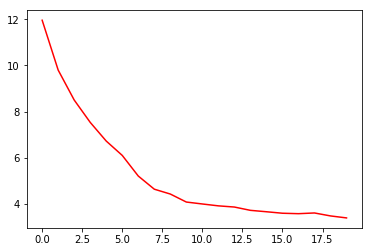

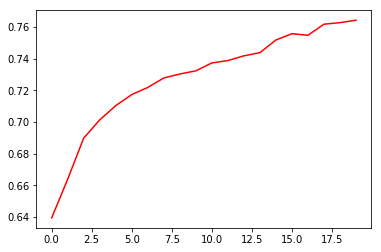

Test Accuracy:  0.7265469
MSE: 3.3812


In [47]:
# We have defined a learning rate of 7e-3 based on practice
# We are going through 20 epochs
learning_rate = 7e-3
training_epochs = 20
cost_history = np.empty(shape=[1], dtype = float) #This forms our loss function history
n_dim = Xdem.shape[1]           # This is the input size
n_class = 2                     # This is the output size
model_path = "C:\\Users\\Yash Kumar\\Desktop\\Studies\\Spring 2018\\Practical Data Science\\Tutorial\\modelv1"
n_hidden1 = 20                  # Number of hidden units in first hidden layer
n_hidden2 = 20                  # Number of hidden units in second hidden layer
x = tf.placeholder(tf.float32, [None, n_dim])     # x is our Training example
# W = tf.Variable(tf.zeros([n_dim, n_class]))       
# b = tf.Variable(tf.zeros([n_dim, n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class]) # predicted y value
def multilayer_perceptron(x, weights, biases):            # Forward pass for training
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])  #sigmoid activation function for first layer
    layer_1 = tf.nn.sigmoid(layer_1)
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']) #ReLU activation function for first layer
    layer_2 = tf.nn.relu(layer_2)
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden1])),           # Dictionary names for every hidden layer weights
    'h2': tf.Variable(tf.truncated_normal([n_hidden1, n_hidden2])),
    'out': tf.Variable(tf.truncated_normal([n_hidden2, n_class]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden1])),                  # Dictionary names for every hidden layer biases
    'b2': tf.Variable(tf.truncated_normal([n_hidden2])),
    'out': tf.Variable(tf.truncated_normal([n_class]))    
}
init = tf.global_variables_initializer()                                  # Initialization
saver = tf.train.Saver()
y = multilayer_perceptron(x, weights, biases)                             # storing forward pass value in y
# The loss function is cross-entropy
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y,labels=y_))
# All the heavy-weight backpropagation is taken care of
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
sess = tf.Session()
sess.run(init)
mse_history = []
accuracy_history = []
# Running the code for 20 epochs
for epoch in range(training_epochs):       # Loop for epochs
    for iter in range(2002):               # Loop for each training example
        sess.run(training_step, feed_dict = {x: [train_xd[iter]], y_: [train_yd[iter]]}) # the weight updates are taking place on its own
    cost,y_out = sess.run([cost_function, y], feed_dict = {x: train_xd, y_: train_yd})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y_out,1), tf.argmax(train_yd,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#     print("Accuracy: ", (sess.run(accuracy, feed_dict = {x: test_xd, y_:test_yd})))
    pred_y = sess.run(y, feed_dict={x: test_xd})
    mse = tf.reduce_mean(tf.square(pred_y - test_yd))          # Using mean squared error loss function
    mse_ = sess.run(mse)
    mse_history.append(mse_) # Appending MSE to plot graphs
    accuracy = sess.run(accuracy, feed_dict={x:train_xd, y_:train_yd})
    accuracy_history.append(accuracy) # Checking Accuracy on the Training Dataset
    print('epoch:',epoch,' - cost:',cost," - MSE:",mse_,"- Train Accuracy:",accuracy)

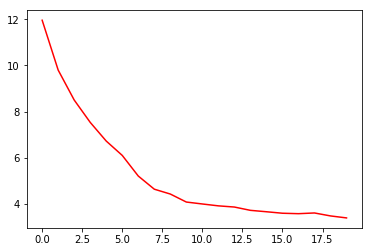

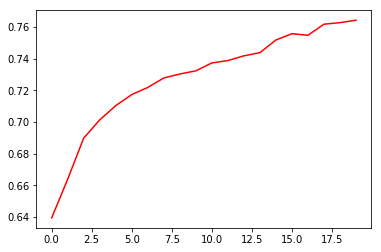

In [48]:
plt.plot(mse_history,'r')  # Plot of the MSE history
plt.show()  
plt.plot(accuracy_history,'r') # Plot of the Accuracy history
plt.show()

In [49]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy: ", (sess.run(accuracy, feed_dict = {x: test_xd, y_:test_yd})))   # Accuracy on the Test Cases
pred_y = sess.run(y, feed_dict={x: test_xd})
mse = tf.reduce_mean(tf.square(pred_y - test_yd))
print("MSE: %.4f" %sess.run(mse))                    # Mean Squared Error on the test cases

Test Accuracy:  0.7265469
MSE: 3.3812


It is working! We were able to train a neural network which is predicting primary results with 73% accuracy. It is not much, however, there is scope for improvement. We can continue to tweak hyperparameters to increase the accuracy. This is just a small example to show how powerful Tensorflow is. It takes care of weight updates in single steps and offers GPU support to allow fitting of complex network architecture. You are free to use the dataset and keep on increasing the accuracy.

What accuracy can you achieve? The same code can be run on The Republican dataset as well. As an exercise, please try to replicate the training of the model on the Republican Dataset as well.

In [55]:
# Try training the model yourself for the Republican Party

epoch: 0  - cost: 0.833284  - MSE: 118.3616548411715 - Train Accuracy: 0.46125463
epoch: 1  - cost: 0.6648882  - MSE: 86.29087003871805 - Train Accuracy: 0.63145757
epoch: 2  - cost: 0.5954291  - MSE: 66.21459187626198 - Train Accuracy: 0.69603324
epoch: 3  - cost: 0.5569075  - MSE: 52.7170626950022 - Train Accuracy: 0.724631
epoch: 4  - cost: 0.535856  - MSE: 43.25810992801174 - Train Accuracy: 0.74261993
epoch: 5  - cost: 0.5232699  - MSE: 36.65930412975655 - Train Accuracy: 0.74630994
epoch: 6  - cost: 0.5147934  - MSE: 31.429574091193683 - Train Accuracy: 0.7532288
epoch: 7  - cost: 0.50866127  - MSE: 28.18538632783393 - Train Accuracy: 0.76060885
epoch: 8  - cost: 0.50469816  - MSE: 26.604877126683757 - Train Accuracy: 0.76014763
epoch: 9  - cost: 0.50064695  - MSE: 25.60903875124142 - Train Accuracy: 0.76153135
epoch: 10  - cost: 0.49717268  - MSE: 24.56672787637492 - Train Accuracy: 0.76060885
epoch: 11  - cost: 0.4941253  - MSE: 23.732687023141875 - Train Accuracy: 0.76107013
e

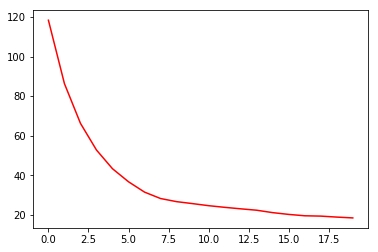

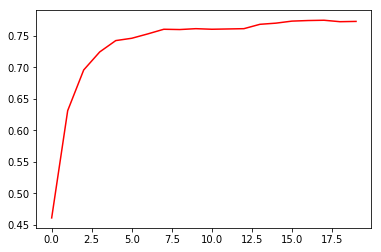

Test Accuracy:  0.7495396
MSE: 18.3759


In [56]:
# Try getting the plots and the test accuracy as well

## Bonus: Introduction to Tensorboard

One of the great things about Tensorflow is that it allows great visualization of your computational models. Usually, when implementing deep learning architectures, it is easy to lose track of the hidden layers and units. The visualization is done in an environment called Tensorboard. For that reason, we will just show, how the graph flows can be visualized. Interestingly, you can tweak tensorflow and visualize Tensorboard graphs interactively in a Python Notebook, without needing a new window. The code has been taken from [1].

The code has not been claimed to be written by me. I am merely using it for educational purposes. I have commented it, in case, you don't want to use it.

In [50]:
# from IPython.display import clear_output, Image, display, HTML
# def strip_consts(graph_def, max_const_size=32):
#     """Strip large constant values from graph_def."""
#     strip_def = tf.GraphDef()
#     for n0 in graph_def.node:
#         n = strip_def.node.add() 
#         n.MergeFrom(n0)
#         if n.op == 'Const':
#             tensor = n.attr['value'].tensor
#             size = len(tensor.tensor_content)
#             if size > max_const_size:
#                 tensor.tensor_content = "<stripped %d bytes>"%size
#     return strip_def
# def show_graph(graph_def, max_const_size=32):
#     """Visualize TensorFlow graph."""
#     if hasattr(graph_def, 'as_graph_def'):
#         graph_def = graph_def.as_graph_def()
#     strip_def = strip_consts(graph_def, max_const_size=max_const_size)
#     code = """
#         <script src="//cdnjs.cloudflare.com/ajax/libs/polymer/0.3.3/platform.js"></script>
#         <script>
#           function load() {{
#             document.getElementById("{id}").pbtxt = {data};
#           }}
#         </script>
#         <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
#         <div style="height:600px">
#           <tf-graph-basic id="{id}"></tf-graph-basic>
#         </div>
#     """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

#     iframe = """
#         <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
#     """.format(code.replace('"', '&quot;'))
#     display(HTML(iframe))

In [57]:
# filepath = "C:/Users/Yash Kumar/Desktop/Studies/Spring 2018/Practical Data Science/Tutorial"
# g = tf.Graph()
# with g.as_default():
#     node1 = tf.constant(3.0, tf.float32)
#     node2 = tf.constant(4.0)
#     result = tf.add(node1, node2, name = "add")
#     triple3 = result*3
# #     result1 = sess.run(tf.add(node1, node2))
#     writer = tf.summary.FileWriter(filepath, g)
# #     print(result)
# show_graph(g)

If you look at the graph documentation closely, you can understand how the tensors are "flowing".

## Applications

The initial aim of ANNs was to solve problems in the same way that a human brain would. However, over time, attention focused on matching specific tasks, rather than focussing on the biological aspect. ANNs have been used in various domains, including computer vision, speech recognition, defeating world champions in board games etc.

Now, simple neural networks have been taken over by advanced architectures, such as recurrent neural networks, convolutional neural networks etc. However, the underlying principle is the same, which is updating the weights to better fit the training example.

                                                                                        - Yash Kumar (yashk@andrew.cmu.edu)

## References

[1] https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/deepdream/deepdream.ipynb